In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv',sep='\t')
df.head()

,label,value
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!


In [3]:
len(df)

5567

In [4]:
df['length']=df['value'].str.len()

In [5]:
df['label'].value_counts()

ham     4821
spam     746
Name: label, dtype: int64

In [6]:
ham=df[df['label']=='ham']
ham.head()

,label,value,length
0,ham,I've been searching for the right words to tha...,196
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!,36
5,ham,As per your request 'Melle Melle (Oru Minnamin...,160


In [7]:
spam=df[df['label']=='spam']
spam.head()
spam['value'].iloc[0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [8]:
data = ham.append(spam,ignore_index=True)
data.tail()

,label,value,length
5562,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
5563,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
5564,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
5565,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147
5566,spam,This is the 2nd time we have tried 2 contact u...,160


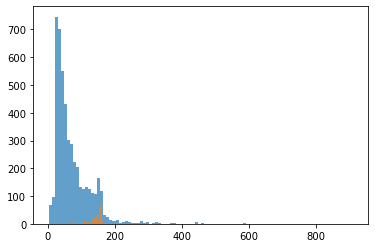

In [9]:
plt.hist(ham['length'],bins=100,alpha=0.7)
plt.hist(spam['length'],bins=100,alpha=0.7)
plt.show()

In [10]:
max(spam['length'])

223

### DATA PREPERATION

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
X_train,X_test,y_train,y_test=train_test_split(data['value'],data['label'],test_size=0.3,random_state=0,shuffle=True,stratify=data['label'])

In [14]:
X_train.head()

3930    Never try alone to take the weight of a tear t...
5554    URGENT! Last weekend's draw shows that you hav...
4020                               Where r e meeting tmr?
2340    House-Maid is the murderer, coz the man was mu...
3319    Let's pool our money together and buy a bunch ...
Name: value, dtype: object

In [15]:
y_train.head()

3930     ham
5554    spam
4020     ham
2340     ham
3319     ham
Name: label, dtype: object

### Bag of words

### Pipeline and RF

### Pipeline and SVM

In [32]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1000,gamma='auto'))])

In [33]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [34]:
y_pred=clf.predict(X_test)

In [35]:
confusion_matrix(y_test,y_pred)

array([[1446,    1],
       [  32,  192]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.9802513464991023

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1447
        spam       0.99      0.86      0.92       224

    accuracy                           0.98      1671
   macro avg       0.99      0.93      0.95      1671
weighted avg       0.98      0.98      0.98      1671



In [38]:
clf.predict(["Hey siva? how are you"])

array(['ham'], dtype=object)

In [41]:
clf.predict(["You have won free tickets to China this summer."])

array(['spam'], dtype=object)